## Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

1.1 Read the data and do exploratory data analysis (3 pts). Describe the data briefly. Interpret the inferences for each (3 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there.

In [1]:
# Importing the necessary libraries:

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading the data into a dataframe:

In [4]:
bank=pd.read_csv('bank_marketing_part1_Data.csv')

In [5]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
bank.shape

(210, 7)

In [8]:
bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [9]:
bank.duplicated().sum()

0

In [10]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


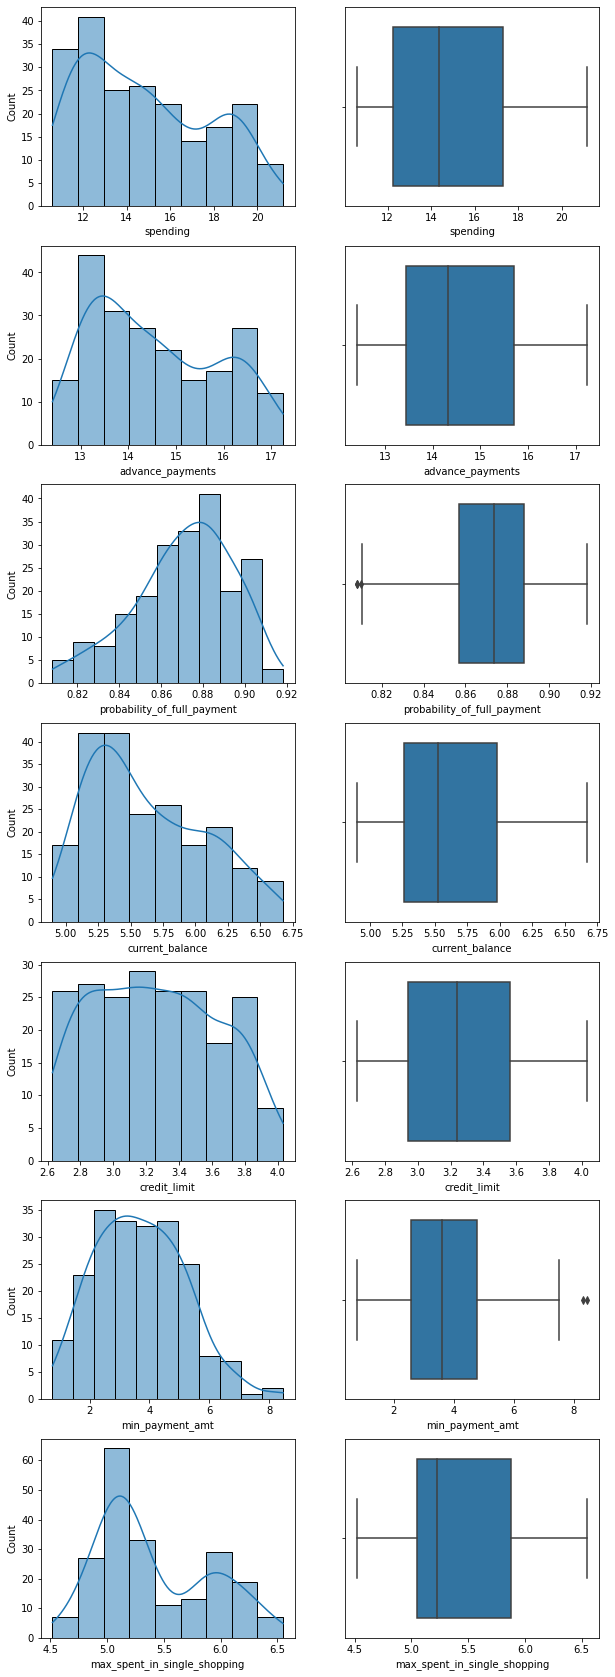

In [11]:
fig,axes = plt.subplots(nrows=7,ncols=2,figsize=(10,30))

sns.histplot(bank['spending'], kde=True, ax=axes[0,0])
sns.boxplot(x=bank['spending'],ax=axes[0,1])

sns.histplot(bank['advance_payments'], kde=True, ax=axes[1,0])
sns.boxplot(x=bank['advance_payments'],ax=axes[1,1])

sns.histplot(bank['probability_of_full_payment'], kde=True, ax=axes[2,0])
sns.boxplot(x=bank['probability_of_full_payment'],ax=axes[2,1])

sns.histplot(bank['current_balance'], kde=True, ax=axes[3,0])
sns.boxplot(x=bank['current_balance'],ax=axes[3,1])

sns.histplot(bank['credit_limit'], kde=True, ax=axes[4,0])
sns.boxplot(x=bank['credit_limit'],ax=axes[4,1])

sns.histplot(bank['min_payment_amt'], kde=True, ax=axes[5,0])
sns.boxplot(x=bank['min_payment_amt'],ax=axes[5,1])

sns.histplot(bank['max_spent_in_single_shopping'], kde=True, ax=axes[6,0])
sns.boxplot(x=bank['max_spent_in_single_shopping'],ax=axes[6,1])

plt.show()

lower range =  0.8105875 and upper range =  0.9340875


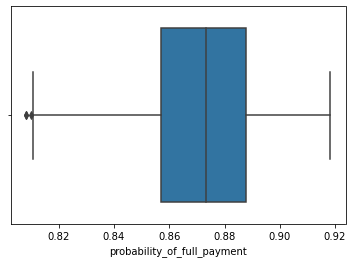

lower range =  -0.7493750000000006 and upper range =  8.079625


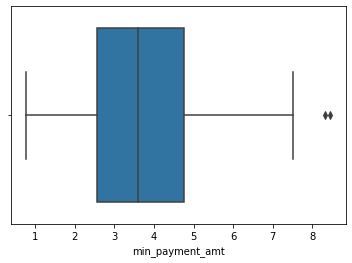

In [12]:
def detect_outlier(col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

lr1,ur1 = detect_outlier(bank['probability_of_full_payment'])
print('lower range = ',lr1,'and upper range = ',ur1)
sns.boxplot(x=bank['probability_of_full_payment'])
plt.show()

lr2,ur2 = detect_outlier(bank['min_payment_amt'])
print('lower range = ',lr2,'and upper range = ',ur2)
sns.boxplot(x=bank['min_payment_amt'])
plt.show()

In [13]:
bank[bank['min_payment_amt']>ur2]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
5,12.7,13.41,0.8874,5.183,3.091,8.456,5.000
89,13.2,13.66,0.8883,5.236,3.232,8.315,5.056


In [14]:
bank[bank['probability_of_full_payment']<lr1]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
77,12.13,13.73,0.8081,5.394,2.745,4.825,5.220
189,11.75,13.52,0.8082,5.444,2.678,4.378,5.310


In [15]:
print('spending')
print(np.log(bank['spending']).skew())
print(np.log(bank['spending']).kurtosis())
print('')
print('advance_payments')
print(np.log(bank['advance_payments']).skew())
print(np.log(bank['advance_payments']).kurtosis())
print('')
print('probability_of_full_payment')
print(np.log(bank['probability_of_full_payment']).skew())
print(np.log(bank['probability_of_full_payment']).kurtosis())
print('')
print('current_balance')
print(np.log(bank['current_balance']).skew())
print(np.log(bank['current_balance']).kurtosis())
print('')
print('credit_limit')
print(np.log(bank['credit_limit']).skew())
print(np.log(bank['credit_limit']).kurtosis())
print('')
print('min_payment_amt')
print(np.log(bank['min_payment_amt']).skew())
print(np.log(bank['min_payment_amt']).kurtosis())
print('')
print('max_spent_in_single_shopping')
print(np.log(bank['max_spent_in_single_shopping']).skew())
print(np.log(bank['max_spent_in_single_shopping']).kurtosis())
print('')

spending
0.18169183165770966
-1.2165129462038178

advance_payments
0.2871778615975514
-1.1720822938038862

probability_of_full_payment
-0.6023094030855518
-0.04450364648555727

current_balance
0.41794251170684116
-0.9056848145885619

credit_limit
-0.018486686604011593
-1.1276109942976398

min_payment_amt
-0.6931011476478448
0.3159013568309299

max_spent_in_single_shopping
0.44652864901026434
-0.9196725920638587



In [16]:
corr1=bank.corr()
round(corr1,2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.00,0.99,0.61,0.95,0.97,-0.23,0.86
advance_payments,0.99,1.00,0.53,0.97,0.94,-0.22,0.89
probability_of_full_payment,0.61,0.53,1.00,0.37,0.76,-0.33,0.23
current_balance,0.95,0.97,0.37,1.00,0.86,-0.17,0.93
credit_limit,0.97,0.94,0.76,0.86,1.00,-0.26,0.75
min_payment_amt,-0.23,-0.22,-0.33,-0.17,-0.26,1.00,-0.01
max_spent_in_single_shopping,0.86,0.89,0.23,0.93,0.75,-0.01,1.00


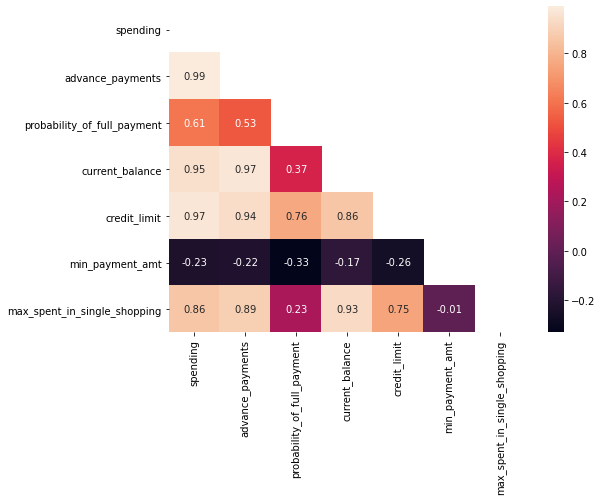

In [17]:
fig_dims=(8,6)
fig=plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr1,dtype=np.bool))
sns.heatmap(round(corr1,2),annot=True,mask=mask)
plt.show()

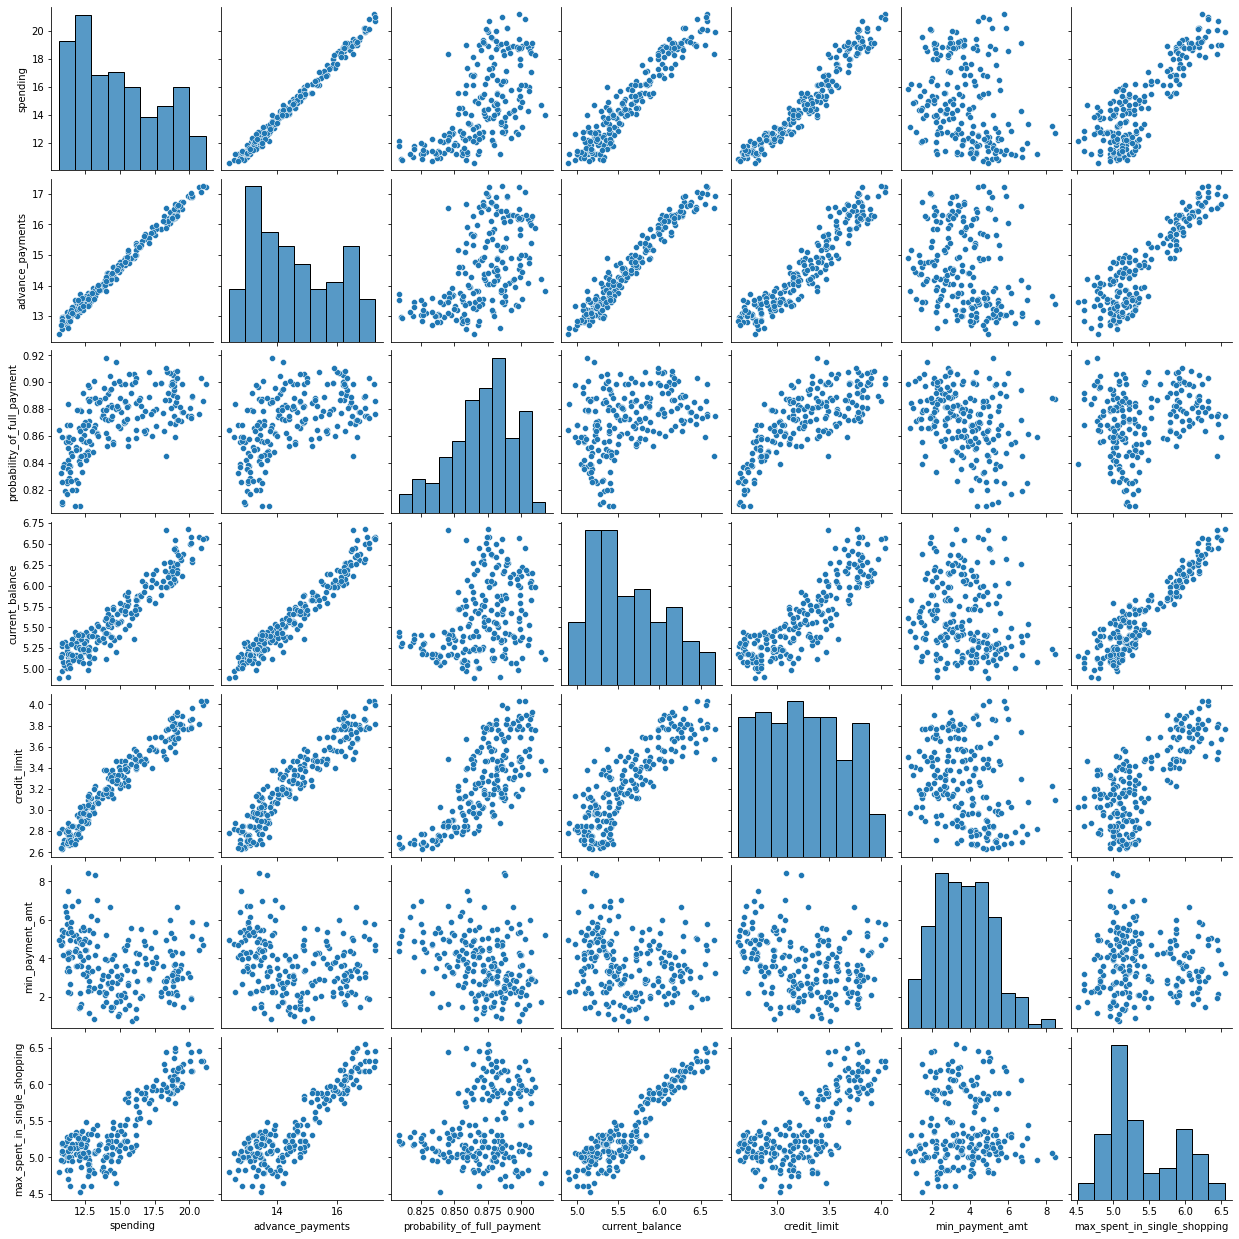

In [18]:
sns.pairplot(bank)

Inference:
1. We see that there are 7 columns which are being considered as features for this dataset.
2. The features describe the banking details of 210 customers.
3. We can see that there are no null values in the dataset which means all the columns for each customer is filled properly, as well as, all the values are float(numerical/continuous).We do not have any categorical columns.
4. We can see that the data is not scaled as different features have values in different ranges/scales.
5. The data set does not have any duplicate values. So we can infer from this that all the data is provided for distinct customers i.e. there are no customers repeated in the data set.
6. The data set has data for which the mean and the modes are close to each other for some of the features. Hence we can deduce that the features credit_limit,probability_of_full_payment have an almost normal distribution.
7. From the boxplots of 'min_payment_amt','probability_of_full_payment', we can observe that these two features contain outliers. The 'min_payment_amt' has outliers on the upper side where as 'probability_of_full_payment' has outliers on the lower side and very close to the minima, which might be the reason of the respective skewness in each column values.
8. For 'probability_of_full_payment', we have got 3 outliers on the lower side whereas for 'min_payment_amt' , we have got 2 outliers on the upper side.
9. From the hist plots, we can see that most of the features are right skewed by a heavy degree, except 'probability_of_full_payment' which is left skewed.
10. From the skewness and kurtosis calculation, we see that for 'spending','advance_payments' and 'credit_limit', the kurtosis is beyong the ideal value of +1 to -1. The skewness for all the features are in the ideal range. 'credit_limit' has the least amount of skewness.
11. From the correlation table, we see that most of the features are highly correlated with each other, except 'min_payment_amt', which is negatively correlated with the rest of the features.
12. From the bivariate analysis using the pairplot, we observe that:
        spending, advance_payments : extremely correlated
        spending,current_balance : highly correlated
        spending,credit_limit : highly correlated
        advance_payments,current_balance : highly correlated
        advance_payments,credit_limit : highly correlated
        probability_of_full_payment,credit_limit : moderately correlated
        probability_of_full_payment,min_payment_amt : negatively correlated
        min_payment_amt,rest of features : low/negative correlation

1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.

In [19]:
# Checking the description of the dataframe:

In [20]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


Inference:
We can see that different measures such as mean,median for 'spending','advance_payments' are in the ranges of 10s whereas the same measures for 'current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping' are in the range of 1s and for 'probability_of_full_payment', it is in 0.1s.
So we can see that mean,medians,standard deviations,max,min for these features are in different ranges and scales from 0.1s to 10s.

So it is necessary for us to use scaling for this data set. Scaling is required since the different scale values are going to affect the euclidean distances between the different observations which might negatively affect the clustering process and give ineffective results.
   

We will be using the StandardScaler method for standardisation process. This method is going to scale the data for all the given features and scales the data such that the mean of all the features moves near to 0 and the standard deviation tends to 1.

In [21]:
# Importing the Standard Scaler module:

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Creating an object for the StandardScaler function:

In [24]:
x=StandardScaler()

In [25]:
bank.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [26]:
bank_scaled = pd.DataFrame(x.fit_transform(bank),columns=bank.columns)

In [27]:
bank_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [28]:
bank_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.260896e-15,1.002389,-2.668236,-0.598079,0.103993,0.711677,2.006586
current_balance,210.0,-1.358702e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.790757e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,5.418946e-16,1.002389,-1.956769,-0.759148,-0.067469,0.712379,3.170590
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


As we can see, for the scaled data, the mean of all the features tends to 0 and the standard deviation tends to 1. Also, all the features now have the various measures in the same scale.

1.3 Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.

In [29]:
# Applying the hierarchical clustering to the scaled data:

In [30]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [31]:
wardlink = linkage(bank_scaled, method='ward')

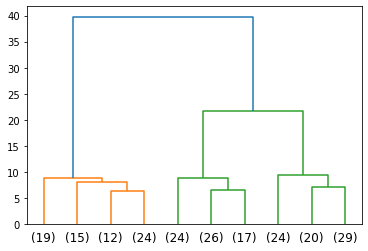

In [32]:
dend = dendrogram(wardlink,truncate_mode='lastp',p=10)

To create the dendrogram, we have used the linkage method as 'ward' which used the cluster variance amongst the observations to cluster.

For the above dendrogram, we have cut the tree using the lastp method which shows the dendrogram with p number of split counts. The dendrogram shows the last 10 merges which gives us a clear picture of the splits and their counts as well. From the dendrogram we can see that there are 3 distinct clusters, namely blue, orange and green.

Similar records are joined by lines whose vertical length reflects the distance between the records. From the dendrogram, we can see that for the orange cluster, the records are comparitively closer than those in the green cluster.

The difference in height between the green and the orange cluster merges are significantly large depicting that the inter cluster distance is significant which is a favourable requirement.

In [33]:
# Using fcluster to create the clusters:

In [34]:
from scipy.cluster.hierarchy import fcluster

In [35]:
clusters = fcluster(wardlink,3,criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

We have used the 'maxclust' criterion for creating the clusters which finds a minimum threshold so that the cophenetic distance between any two original observations in the same flat cluster is no more than the threshold and no more than 3 flat clusters are formed.

In [36]:
len(clusters)

210

We can see that the 'fcluster' method has alloted all the observations into 3 different clusters on the basis of the feature values.

In [37]:
# Appending the cluster annotation to the original data frame

In [38]:
bank['cluster_fcluster'] = clusters

In [41]:
bank.head(n=10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_fcluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,3
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2


In [94]:
bank['cluster_fcluster'].value_counts().sort_index()

1    70
2    67
3    73
Name: cluster_fcluster, dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster_fcluster', ylabel='count'>

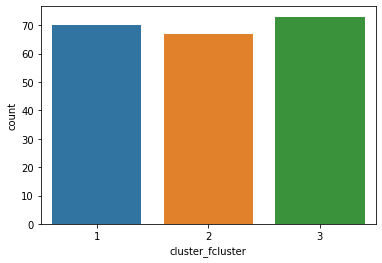

In [96]:
sns.countplot(bank['cluster_fcluster'])

In [44]:
# Alternatively, using Agglomerative clustering method:

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
clusters1 = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [47]:
cluster_agglo = clusters1.fit_predict(bank_scaled)
cluster_agglo

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0], dtype=int64)

We have used affinity as euclidean which is a measure to compute the linkage.

In [48]:
#Appending the new cluster to the original data set:

In [49]:
bank['cluster_agglo']=cluster_agglo

In [50]:
bank.head(n=10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_fcluster,cluster_agglo
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2,2
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2,2
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,3,0
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1,1
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,2


In [97]:
bank['cluster_agglo'].value_counts().sort_index()

0    73
1    70
2    67
Name: cluster_agglo, dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster_agglo', ylabel='count'>

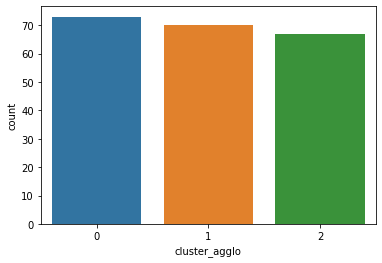

In [98]:
sns.countplot(bank['cluster_agglo'])

From the agglomerative clustering, we see a similar clustering distribution as that from the fcluster.

1.4 Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). Apply elbow curve and silhouette score (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Silhouette Score must be calculated for the same values of K taken above and commented on. Report must contain logical and correct explanations for choosing the optimum clusters using both elbow method and silhouette scores. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.

In [52]:
# Applying the K-Means cluster method to the scaled data:

In [53]:
from sklearn.cluster import KMeans

In [54]:
# Deriving number of clusters,starting with k=2:

In [55]:
k_means = KMeans(n_clusters=2,random_state=1)

In [56]:
k_means.fit(bank_scaled)

KMeans(n_clusters=2, random_state=1)

In [57]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [58]:
k_means.inertia_

659.171754487041

In [59]:
#Similarly, for k=1,3,4,5,6,7...

k=1

In [60]:
k_means = KMeans(n_clusters=1,random_state=1)
k_means.fit(bank_scaled)

KMeans(n_clusters=1, random_state=1)

In [61]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
k_means.inertia_

1469.9999999999998

k=3

In [63]:
k_means = KMeans(n_clusters=3,random_state=1)
k_means.fit(bank_scaled)

KMeans(n_clusters=3, random_state=1)

In [64]:
k_means.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [65]:
k_means.inertia_

430.6589731513006

k=4

In [66]:
k_means = KMeans(n_clusters=4,random_state=1)
k_means.fit(bank_scaled)

KMeans(n_clusters=4, random_state=1)

In [67]:
k_means.labels_

array([3, 1, 3, 0, 3, 0, 0, 1, 3, 0, 3, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0,
       3, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 2, 3,
       0, 0, 1, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 1, 0, 0, 2, 1, 3,
       3, 1, 3, 1, 1, 0, 3, 3, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 0, 2, 2, 2,
       2, 0, 1, 3, 1, 0, 1, 3, 3, 2, 0, 2, 1, 3, 2, 3, 1, 3, 3, 0, 1, 3,
       2, 1, 3, 0, 0, 2, 1, 1, 0, 3, 1, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 1,
       1, 3, 0, 3, 3, 0, 2, 1, 2, 1, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 2, 3, 0, 3, 2, 3, 0, 2, 1, 1, 0, 1, 0, 1, 3, 3, 3,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 3, 1, 2, 3, 0,
       3, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2])

In [68]:
k_means.inertia_

371.38509060801096

k=5

In [69]:
k_means = KMeans(n_clusters=5,random_state=1)
k_means.fit(bank_scaled)

KMeans(n_clusters=5, random_state=1)

In [70]:
k_means.labels_

array([3, 1, 3, 0, 3, 4, 0, 1, 3, 0, 3, 1, 0, 3, 1, 4, 1, 4, 4, 0, 4, 4,
       3, 0, 1, 2, 1, 0, 0, 4, 1, 0, 4, 1, 0, 0, 4, 4, 0, 3, 3, 1, 2, 3,
       0, 4, 1, 3, 3, 3, 0, 3, 3, 3, 3, 2, 4, 4, 0, 3, 1, 4, 0, 2, 1, 3,
       3, 1, 3, 4, 1, 4, 3, 3, 4, 3, 1, 0, 2, 1, 1, 1, 1, 3, 0, 2, 2, 2,
       2, 4, 1, 3, 1, 0, 4, 3, 3, 2, 0, 2, 4, 3, 1, 3, 1, 3, 3, 4, 4, 3,
       2, 1, 3, 4, 0, 2, 1, 4, 4, 3, 1, 0, 4, 0, 1, 1, 3, 0, 1, 1, 0, 1,
       1, 3, 0, 2, 3, 4, 2, 1, 2, 1, 0, 4, 1, 4, 3, 0, 1, 0, 1, 4, 1, 2,
       4, 1, 1, 0, 1, 2, 3, 4, 3, 2, 3, 4, 2, 1, 1, 0, 1, 0, 1, 3, 3, 3,
       1, 0, 2, 4, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 0, 3, 1, 2, 3, 4,
       3, 0, 1, 2, 1, 4, 2, 1, 2, 1, 1, 2])

In [71]:
k_means.inertia_

327.21278165661346

We see that as the number of clusters increases, the inertia(WSS or Within cluster Sum-of-Squares), which is the measure of variability of observations within each cluster keeps on decreasing.

In [72]:
# Calculating WSS for further values of K:

In [73]:
wss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(bank_scaled)
    wss.append(km.inertia_)

In [74]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267,
 241.81894656086033,
 223.91254221002725,
 206.39612184786694]

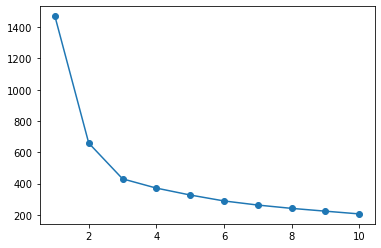

In [75]:
plt.plot(range(1,11),wss,marker='o')
plt.show()

From the WSS/Elbow plot we see that till value 3, the drop is significant, after which the drop becomes difficult to distinguish, so we ideally use k=3 for clustering.

In [76]:
k_means = KMeans(n_clusters=3,random_state=1)
k_means.fit(bank_scaled)
k_means.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [77]:
#Appending the labels from kmeans to the original data set:

In [78]:
bank['cluster_kmeans']=k_means.labels_

In [79]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_fcluster,cluster_agglo,cluster_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,2


In [80]:
# Calculating Silhoutte score:

In [81]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [82]:
silhouette_score(bank_scaled,k_means.labels_)

0.4007270552751299

In [83]:
sil_width=silhouette_samples(bank_scaled,k_means.labels_)

In [84]:
bank['sil_width']=sil_width

In [85]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_fcluster,cluster_agglo,cluster_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,2,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,0,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,2,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,2,0.362276


In [86]:
sil_width.min()

0.002713089347678533

In [87]:
sil_width.max()

0.6392852347162192

Since the minimum and maximum silhouette score is positive, all data are mapped correctly to the clusters and the clusters are well separated.

In [88]:
sil_score=[]
for i in range(2,11):
    km = KMeans(n_clusters=i,random_state=1)
    km.fit(bank_scaled)
    sil_score.append((silhouette_samples(bank_scaled,km.labels_)).min())
    
sil_score

[-0.006171238927461077,
 0.002713089347678533,
 -0.05384082699360047,
 -0.04818383681538795,
 -0.04844713650536697,
 -0.1095962267141453,
 -0.12813759923966256,
 -0.11072902739655262,
 -0.06812129452799488]

We see that for except k=3, for all the values of k, the silhouette score is showing as negative which mens that the clustering process hasn't been performed properly. Hence we move ahead with the k values of 3 as the number of clusters for the clustering process

1.5 Describe cluster profiles for the clusters defined (2.5 pts). Recommend different promotional strategies for different clusters in context to the business problem in-hand (2.5 pts ). After adding the final clusters to the original dataframe, do the cluster profiling. Divide the data in the finalyzed groups and check their means. Explain each of the group briefly. There should be at least 3-4 Recommendations. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks will only be allotted if the recommendations are correct and business specific. variable means. Students to explain the profiles and suggest a mechanism to approach each cluster. Any logical explanation is acceptable.

In [89]:
#Cluster profiles from fcluster:

In [90]:
bank_agg=bank.groupby('cluster_fcluster').mean()
bank_agg['Freq']=bank['cluster_fcluster'].value_counts().sort_index()
bank_agg

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_agglo,cluster_kmeans,sil_width,Freq
cluster_fcluster,,,,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,1,1.885714,0.451629,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,2,0.985075,0.419314,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,0,0.109589,0.334857,73


Inference:
1. We can see that the cluster 3 has the highest frequence and the maximum number of observations.
2. All the clusters have almost equal number of observations.
3. When we see the probability of full payment, we see that the mean value is highest for cluster 1.
4. Both Agglomerative and fcluster methods of clustering provide us a similar cluster distribution for all the observations.

In [91]:
#KMeans Cluster profile:

In [99]:
bank_agg1 = bank.groupby('cluster_kmeans').mean()
bank_agg1['Freq'] = bank['cluster_kmeans'].value_counts().sort_index()
bank_agg1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_fcluster,cluster_agglo,sil_width,Freq
cluster_kmeans,,,,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,0.084507,0.339816,71
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333,1.833333,0.397473,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.985075,0.468772,67


In [101]:
bank['cluster_kmeans'].value_counts().sort_index()

0    71
1    72
2    67
Name: cluster_kmeans, dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster_kmeans', ylabel='count'>

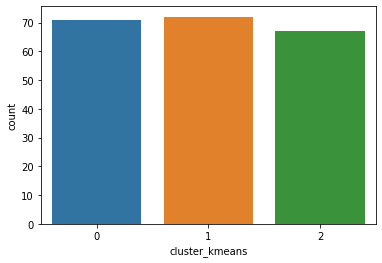

In [102]:
sns.countplot(bank['cluster_kmeans'])

Inference:
1. We can see that the cluster 1 has the highest frequence and the maximum number of observations.
2. All the clusters have almost equal number of observations.
3. When we see the probability of full payment, we see that the mean value is highest for cluster 2.
4. Both Agglomerative and fcluster methods of clustering provide us a similar cluster distribution.

The clustering from kmeans also depicts the similar observations to that of fcluster. If we look closely, the cluster from k means is very much identitical to the fcluster profile.
Cluster 1 from fcluster is similar to Cluster 2 from kmeans.
Cluster 2 from fcluster is similar to Cluster 1 from kmeans.
Cluster 3/0 from fcluster/agglomerative cluster is similar to Cluster 0 from kmeans.

In [93]:
bank.head(20)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_fcluster,cluster_agglo,cluster_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,2,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,0,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,2,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,2,0.362276
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2,2,1,0.218446
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2,2,1,0.472867
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,3,0,0,0.361812
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1,1,2,0.520285
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,2,1,0.532517


Customer Segmentation from fcluster:
1. We can observe that customer from cluster 1 have significantly higher maximum expenditure in a single shopping, from where we can deduce that these customers are comparitively compulsive shoppers and are okay with spending a lot at one go.
2. Customers belonging to cluster 3 have maximum expenditure lowest compared to the other 2, from where we can understand that these customers are extremely careful while making purchases.
3. Customer from cluster 2 are moderate level shoppers.
4. Customers from cluster 1 have higher amounts of current balance, which supports the point that they do not think too much before spending too much.
5. The monthly spending of customers from cluster 1 is also significantly higher compared to 2 and 3. The monthly spending is the least for cluster 2 customers.
6. When it comes to the minimum payment amount, it is the highest for cluster 2 customers. From this we can deduce that cluster 2 customers do spend moderately in shopping but they do not have the tendency to shop compulsively like cluster 1 customers who have the lowest minimum payment amount.
7. Maybe cluster 1 customers shop a lot at a single shopping purchase whereas cluster 2 customers shop moderately but more regularly than cluster 1 customers.

Recommendation for promotional strategies:
1. From the cluster profiling, we can see that customers from cluster 3 have the least credit activities amongst all the other clusters. If we look at their balances and maximum spending, these customers probably come under a lower salary brackets and have moderate credit limit, hence they spend carefully. So in order to target these customers, the company can use promotional strategies like :
    offering the customers a higher credit limit,
    providing higher reward points for each purchase which makes them think of using the credit card more often.
    
In order to approach these customers, the personal interaction needs to be minimal since these customers dont depend on the credit card usage heavily. So promotional offers via calls can be a nuisance for these customers. Offers through sms/emails seem to be appropriate.

2. From the cluster 1 customers, we see that their purchase pattern behaviour works in a way where they can finish off most of their monthly purchases at one go. Since these customers buy a heavy purchase using their credit card, we can promote certain strategies to them the ways below:
    offer them increased cashbacks/discount offers on a purchase amount above a certain limit.
    
Since these customers use credit card for their heavy purchases, providing them personalised offers via a regional finance manager allotted to them might help them motivate for heavier purchases.

3. From the cluster 2, we see that these customers make maximum of their purchases at a regular basis. SO for these customers, if the company can provide some offers such as heavier discounts on certain portals/online shoppings which have the credit card company as their partners.

These customers are already having a regular credit card usage and are used to the entire process, so promotional offers to them via their social media profiles like Facebook,Instagram,Youtube can alert them about any new offers/plans.

## Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

In [103]:
#Understanding the problem statement:

Due to some unforeseen circumstances, the insurance company is facing higher claim frequency than before. So the solution is to predict what are the driving factors which are making this happen.

2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [104]:
# Reading the data into a dataframe:

In [105]:
ins=pd.read_csv('insurance_part2_data.csv')

In [106]:
ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [107]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [108]:
ins.shape

(3000, 10)

In [109]:
ins.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [110]:
ins.duplicated().sum()

139

In [111]:
ins.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


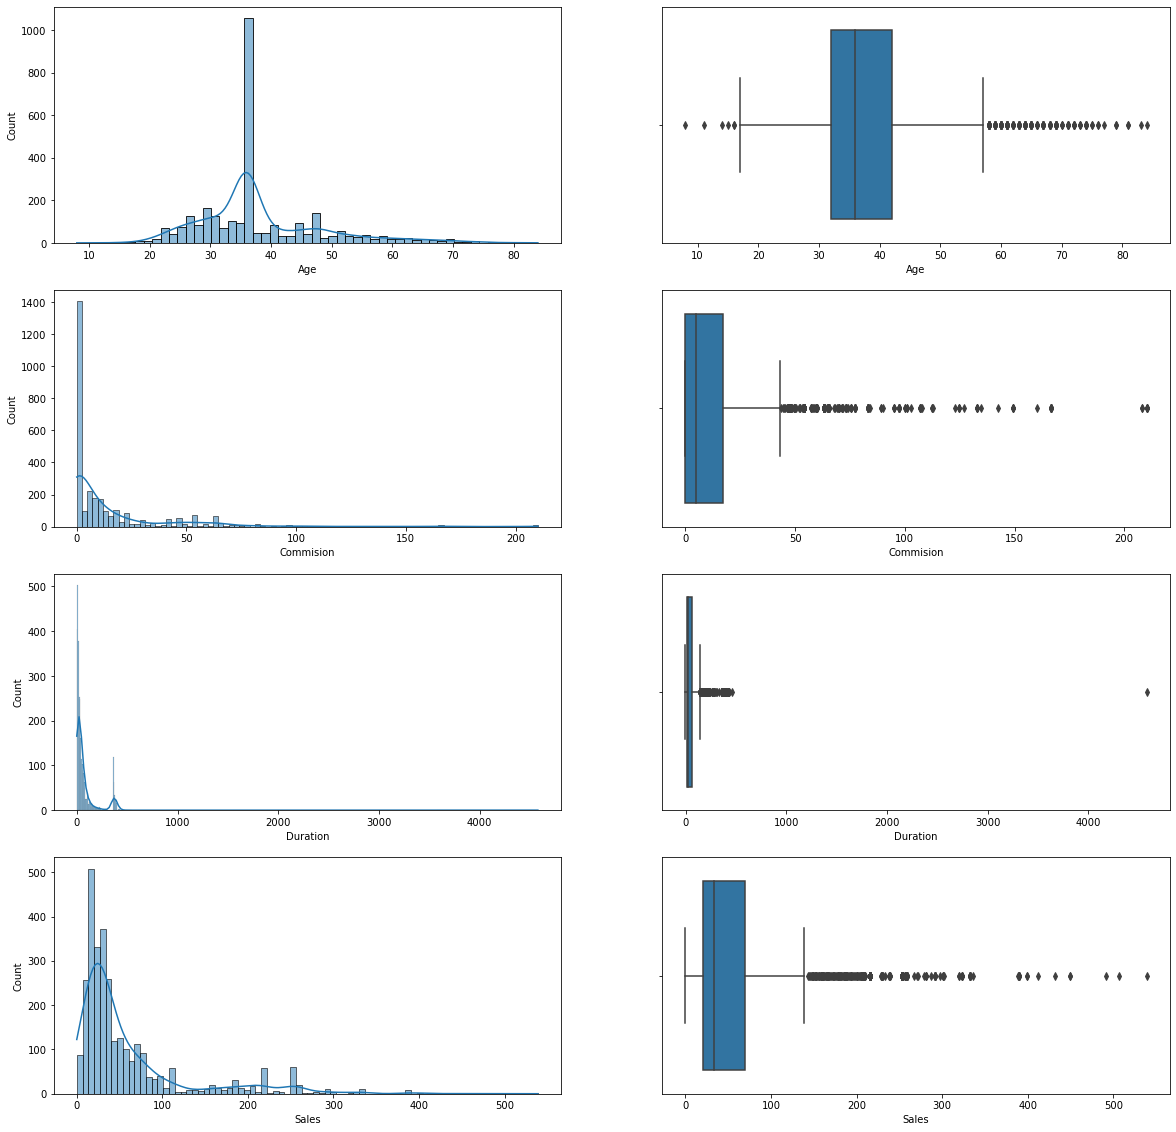

In [112]:
fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(20,20))

sns.histplot(ins['Age'], kde=True, ax=axes[0,0])
sns.boxplot(x=ins['Age'],ax=axes[0,1])

sns.histplot(ins['Commision'], kde=True, ax=axes[1,0])
sns.boxplot(x=ins['Commision'],ax=axes[1,1])

sns.histplot(ins['Duration'], kde=True, ax=axes[2,0])
sns.boxplot(x=ins['Duration'],ax=axes[2,1])

sns.histplot(ins['Sales'], kde=True, ax=axes[3,0])
sns.boxplot(x=ins['Sales'],ax=axes[3,1])

plt.show()

In [113]:
corr2=ins.corr()
round(corr2,2)

,Age,Commision,Duration,Sales
Age,1.00,0.07,0.03,0.04
Commision,0.07,1.00,0.47,0.77
Duration,0.03,0.47,1.00,0.56
Sales,0.04,0.77,0.56,1.00


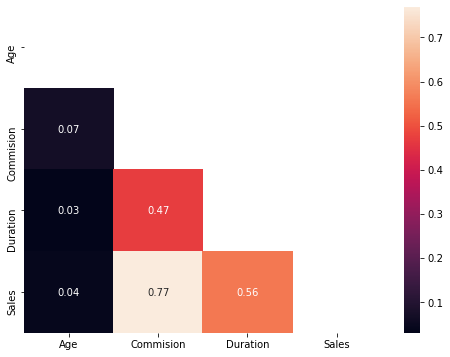

In [114]:
fig_dims=(8,6)
fig=plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr2,dtype=np.bool))
sns.heatmap(round(corr2,2),annot=True,mask=mask)
plt.show()

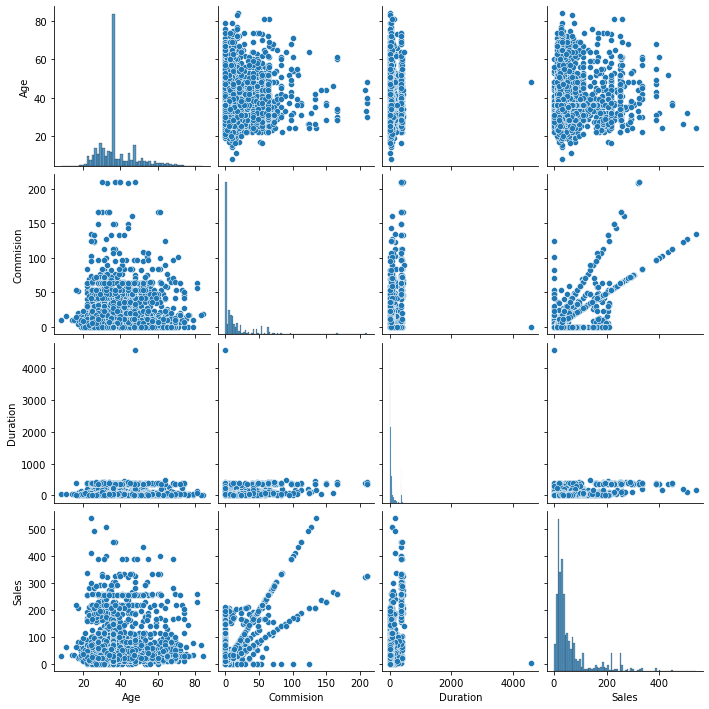

In [115]:
sns.pairplot(ins)

In [116]:
#Treatment of Duplicate values:

In [117]:
ins.duplicated().sum()

139

In [118]:
ins.drop_duplicates(inplace=True)

In [119]:
ins.duplicated().sum()

0

In [120]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 245.9+ KB


So we see that the 139 duplicate values have been dropped from the dataset.

In [121]:
#Treating Anomalies:

We see that for 'Duration', we have got a negative value which cannot be possible. Also the maximum value for 'Duration' is 4580.

In [122]:
ins[ins['Duration']<0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [123]:
ins[ins['Duration']>1000]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA


In [124]:
#Imputing the median values

In [125]:
ins['Duration']=np.where(ins['Duration']<0,ins['Duration'].median(),ins['Duration'])

In [126]:
ins['Duration']=np.where(ins['Duration']>1000,ins['Duration'].median(),ins['Duration'])

In [127]:
ins[ins['Duration']<0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [128]:
ins[ins['Duration']>1000]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [129]:
ins.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Duration,2861.0,70.539322,106.684360,0.0,12.0,28.00,65.00,466.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00


We see that the anomalies have been treated sucessfully.

Checking the index for the data set

In [130]:
ins.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364.0,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5.0,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54.0,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39.0,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15.0,33.00,Bronze Plan,ASIA


We see that there are 2861 records but the final record still has the index of 2999, hence the index needs to be reset.

In [131]:
ins.reset_index(drop=True,inplace=True)

In [132]:
ins.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2856,28,CWT,Travel Agency,Yes,166.53,Online,364.0,256.20,Gold Plan,Americas
2857,35,C2B,Airlines,No,13.50,Online,5.0,54.00,Gold Plan,ASIA
2858,36,EPX,Travel Agency,No,0.00,Online,54.0,28.00,Customised Plan,ASIA
2859,34,C2B,Airlines,Yes,7.64,Online,39.0,30.55,Bronze Plan,ASIA
2860,47,JZI,Airlines,No,11.55,Online,15.0,33.00,Bronze Plan,ASIA


We see that the index has been reset sucessfully.

Inference:
1. We see that there are 9 columns which are being considered as features for this dataset and 1 target variable. Out of these 9 features, 4 are continuous and rest are categorical
2. The features describe the insurance details of 3000 customers.
3. We can see that there are no null values in the dataset which means all the columns for each customer is filled properly.
4. We can see that the data is not scaled as different features have values in different ranges/scales.
5. The data set does has many duplicate values(139 nos). Duplicate values can increase the chances of a biased prediction, hence needs to be treated.
6. From the boxplots of 'Age','Commission','Duration','Sales' we can observe that these features contain lot of outliers. 
7. Few of the outlier values seem to be out of proportion,eg Duration has minimum value of -1 which is not possible. These need to be treated.
8. From the hist plots, we can see that 'Commission','Duration','Sales' are right skewed by a heavy degree.
9. From the correlation heatmap we see that the continuous variable have very low correlation to each other.
10. The only features which are highly correlated are Commision and Sales since bigger sales reward bigger commisions.
11. Since we are supposed to remove the duplicate records, we need to reset the index.

2.2 Data Split: Split the data into test and train(1 pts), build classification model CART (1.5 pts), Random Forest (1.5 pts), Artificial Neural Network(1.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.

In [133]:
# We need to convert all object type of our independent variables to int type:

In [134]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 223.6+ KB


In [135]:
for feature in ins.columns:
    if ins[feature].dtype=='object':
        ins[feature]=pd.Categorical(ins[feature]).codes

In [136]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(3), int64(1), int8(6)
memory usage: 106.3 KB


We see that all the object type variables have been converted to int8 or categorical values

In [137]:
ins['Claimed'].value_counts()

0    1947
1     914
Name: Claimed, dtype: int64

In [138]:
# Claim rate:

In [139]:
(ins['Claimed'].sum()/2861)*100

31.946871723173714

In [140]:
# Importing the necessary libraries:

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [142]:
#Splitting the data:

In [143]:
x=ins.drop('Claimed',axis=1)
y=ins.pop('Claimed')

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [182]:
x_test

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
630,31,1,1,0.00,0,402.0,97.0,2,0
218,68,2,1,0.00,1,60.0,29.0,1,0
1624,42,0,0,21.00,1,11.0,84.0,4,0
932,44,1,1,23.76,1,51.0,39.6,2,0
783,50,1,1,35.64,1,111.0,59.4,2,0
...,...,...,...,...,...,...,...,...,...
2812,19,1,1,10.50,0,32.0,30.0,2,0
2107,45,2,1,0.00,1,37.0,22.0,2,0
440,51,0,0,4.00,1,5.0,16.0,0,0
2826,53,2,1,0.00,1,13.0,21.0,2,0


In [185]:
x_train

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
1255,69,0,0,6.00,1,7.0,15.0,0,0
2229,36,2,1,0.00,1,29.0,35.0,2,0
877,60,1,1,41.58,1,8.0,69.3,2,1
206,36,0,0,9.75,1,70.0,39.0,4,0
2207,36,2,1,0.00,1,39.0,51.0,1,2
...,...,...,...,...,...,...,...,...,...
2763,27,2,1,0.00,1,19.0,20.0,2,0
905,36,2,1,0.00,1,30.0,42.0,2,0
1096,36,2,1,0.00,1,15.0,13.0,1,0
235,36,2,1,0.00,1,9.0,112.0,2,0


We have chosen the test data size to be 30 percent of the entire data set

In [148]:
#DecisionTreeClassifier:

In [149]:
dt_model = DecisionTreeClassifier(criterion='gini')
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [150]:
#Visualising the decision tree:

In [151]:
from sklearn import tree

In [152]:
train_char_label=['No','Yes']

In [153]:
ins_tree_file = open('ins_tree.dot','w')

In [154]:
dot_data = tree.export_graphviz(dt_model,out_file=ins_tree_file,feature_names=list(x_train),class_names=train_char_label)

In [155]:
ins_tree_file.close()

Inference:
We see that the tree is overgrown since most of the terminal nodes have samples about 1-3. So we need to use pruning techniques. 

In [156]:
# Using pruning techniques in the decision tree:

In [186]:
reg_dt_model = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf = 20,min_samples_split=60,random_state=1)
reg_dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=60,
                       random_state=1)

In [158]:
# Rerunning the tree generator code

In [159]:
ins_tree_file = open('ins_tree.dot','w')

In [160]:
dot_data = tree.export_graphviz(reg_dt_model,out_file=ins_tree_file,feature_names=list(x_train),class_names=train_char_label)

In [161]:
ins_tree_file.close()

We get a pruned decision tree

In [162]:
# Using GridSearch for the best performance decision tree:

In [190]:
from sklearn.model_selection import GridSearchCV

In [191]:
param_grid = {'max_depth': [5,6,7,8,9,10],
              'min_samples_leaf' : [10,15,20,25,30],
              'min_samples_split':[40,50,60,70]
             }

In [192]:
dt_model = DecisionTreeClassifier(random_state=1)

In [193]:
grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid,cv=3)

In [194]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [10, 15, 20, 25, 30],
                         'min_samples_split': [40, 50, 60, 70]})

In [168]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 50}

In [196]:
best_grid1 = grid_search.best_estimator_

In [197]:
y_train_predict = best_grid1.predict(x_train)
y_test_predict = best_grid1.predict(x_test)

In [198]:
# Performance measure:

In [172]:
from sklearn.metrics import classification_report

In [199]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1359
           1       0.71      0.58      0.64       643

    accuracy                           0.79      2002
   macro avg       0.76      0.73      0.74      2002
weighted avg       0.78      0.79      0.78      2002



In [200]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       588
           1       0.66      0.52      0.59       271

    accuracy                           0.77       859
   macro avg       0.73      0.70      0.71       859
weighted avg       0.76      0.77      0.76       859



Inference:
We see that the precision,recall and f1_score for train data and test data is almost similar, the test data being few decimals lower. Hence we can say that the model is not overfitted or underfitted. We have tried the training for 3 iterations. Also, the measures are slightly poorer for Claimed insurances because the claimed rate is only 31%. With further data we might be able to get a better performance.

In [175]:
print(pd.DataFrame(best_grid1.feature_importances_,columns = ['Imp'],index = x_train.columns))

                   Imp
Age           0.035507
Agency_Code   0.506788
Type          0.000000
Commision     0.050768
Channel       0.000000
Duration      0.073475
Sales         0.276748
Product Name  0.039970
Destination   0.016744


We observe that 'Agency_Code' and 'Sales' have the highest importances whereas 'Channel' does not influence the prediction in any way

In [201]:
# RandomForestClassifier:

In [202]:
param_grid = {
              'max_depth':[6,7,8],
              'max_features':[5,6,7],
              'min_samples_leaf':[15,20,25],
              'min_samples_split':[40,50,60],
              'n_estimators':[101,301]
              }

In [203]:
rf_model = RandomForestClassifier(random_state=1)

In [204]:
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [6, 7, 8], 'max_features': [5, 6, 7],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [40, 50, 60],
                         'n_estimators': [101, 301]})

In [207]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 7,
 'min_samples_leaf': 15,
 'min_samples_split': 40,
 'n_estimators': 101}

In [208]:
best_grid2 = grid_search.best_estimator_

In [209]:
y_train_predict1 = best_grid2.predict(x_train)
y_test_predict1 = best_grid2.predict(x_test)

In [210]:
print(classification_report(y_train,y_train_predict1))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1359
           1       0.72      0.60      0.65       643

    accuracy                           0.80      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.80      0.79      2002



In [211]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.59      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



Inference:
We see that the precision,recall and f1_score for train data and test data is almost similar, the test data being few decimals lower. Hence we can say that the model is not overfitted or underfitted. Also, the measures are slightly poorer for Claimed insurances because the claimed rate is only 31%. With more data we might be able to get a better performance.

In [212]:
print(pd.DataFrame(best_grid2.feature_importances_,columns = ['Imp'],index = x_train.columns))

                   Imp
Age           0.054290
Agency_Code   0.396211
Type          0.003814
Commision     0.078310
Channel       0.000299
Duration      0.076952
Sales         0.226131
Product Name  0.153222
Destination   0.010769


We observe that 'Agency_Code' and 'Sales' have the highest importances whereas 'Channel' has minimum influence on the prediction.

In [213]:
#MLPClassifier

In [214]:
##Since scaling is not required, as all the features have values in almost the same scale:

In [215]:
param_grid = { 
                'hidden_layer_sizes' : [200],
                'activation' : ['logistic','relu'],
                'solver' : ['sgd','adam'],
                'tol' : [0.1,0.01],
                'max_iter' : [1000,2000]
             }

In [216]:
mlp_model = MLPClassifier(random_state=1)

In [217]:
grid_search = GridSearchCV(estimator = mlp_model, param_grid=param_grid,cv=3)

In [218]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [200], 'max_iter': [1000, 2000],
                         'solver': ['sgd', 'adam'], 'tol': [0.1, 0.01]})

In [220]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 200,
 'max_iter': 1000,
 'solver': 'adam',
 'tol': 0.01}

In [221]:
best_grid3 = grid_search.best_estimator_

In [289]:
y_train_predict2 = best_grid3.predict(x_train)
y_test_predict2 = best_grid3.predict(x_test)

In [223]:
print(classification_report(y_train,y_train_predict2))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1359
           1       0.73      0.31      0.44       643

    accuracy                           0.74      2002
   macro avg       0.74      0.63      0.64      2002
weighted avg       0.74      0.74      0.71      2002



In [224]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       588
           1       0.73      0.31      0.43       271

    accuracy                           0.75       859
   macro avg       0.74      0.63      0.63       859
weighted avg       0.74      0.75      0.71       859



Inference:
We see that if our model's recall increases then it decreases the precision of the model and vice versa. Hence we choose these parameters which give an optimal values of recall and precision.

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Make classification reports for each model. Write inferences on each model (2 pts). Calculate Train and Test Accuracies for each model. Comment on the validness of models (overfitting or underfitting) Build confusion matrix for each model. Comment on the positive class in hand. Must clearly show obs/pred in row/col Plot roc_curve for each model. Calculate roc_auc_score for each model. Comment on the above calculated scores and plots. Build classification reports for each model. Comment on f1 score, precision and recall, which one is important here.

In [225]:
# Performance Metrics:

In [226]:
## For Decision Tree:

In [227]:
from sklearn.metrics import classification_report,confusion_matrix

In [228]:
### Classification Report

In [307]:
print('Train data:')
print(classification_report(y_train,y_train_predict))

Train data:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1359
           1       0.71      0.58      0.64       643

    accuracy                           0.79      2002
   macro avg       0.76      0.73      0.74      2002
weighted avg       0.78      0.79      0.78      2002



In [308]:
print('Test data:')
print(classification_report(y_test,y_test_predict))

Test data:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       588
           1       0.66      0.52      0.59       271

    accuracy                           0.77       859
   macro avg       0.73      0.70      0.71       859
weighted avg       0.76      0.77      0.76       859



In [231]:
### Confusion_Matrix

In [304]:
print('The Confusion matrix for the Decision Tree model for train data set is \n')
confusion_matrix(y_train,y_train_predict)

The Confusion matrix for the Decision Tree model for train data set is 



array([[1208,  151],
       [ 271,  372]], dtype=int64)

In [306]:
print('The Confusion matrix for the Decision Tree model for test data set is \n')
confusion_matrix(y_test,y_test_predict)

The Confusion matrix for the Decision Tree model for test data set is 



array([[516,  72],
       [129, 142]], dtype=int64)

In [234]:
### Accuracy

In [295]:
print('The accuracy score for Decision Tree model for train data set is =',round(best_grid1.score(x_train,y_train),2))

The accuracy score for Decision Tree model for train data set is = 0.79


In [297]:
print('The accuracy score for Decision Tree model for test data set is =',round(best_grid1.score(x_test,y_test),2))

The accuracy score for Decision Tree model for test data set is = 0.77


In [311]:
### ROC

In [312]:
probs_train1 = best_grid1.predict_proba(x_train)

In [313]:
probs_train1 = probs_train1[:,1]

In [314]:
probs_train1

array([0.22916667, 0.37583893, 0.25714286, ..., 0.07228916, 0.16216216,
       0.30188679])

In [315]:
probs_train1.shape

(2002,)

In [316]:
from sklearn.metrics import roc_auc_score,roc_curve

In [317]:
auc_train1 = roc_auc_score(y_train,probs_train1)

In [318]:
auc_train1

0.834996114836062

In [319]:
probs_test1 = best_grid1.predict_proba(x_test)

In [320]:
probs_test1.shape

(859, 2)

In [321]:
probs_test1[:,1].shape

(859,)

In [322]:
auc_test1 = roc_auc_score(y_test,probs_test1[:,1])
auc_test1

0.7887077340161156

In [323]:
fpr,tpr,thresholds = roc_curve(y_train,probs_train1)

Train data:


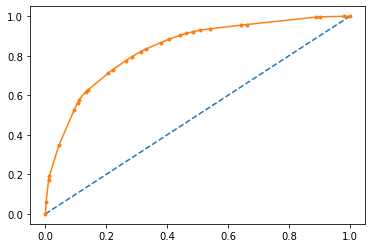

auc_score =  0.834996114836062


In [324]:
print('Train data:')
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.show()
print('auc_score = ',auc_train1)

In [325]:
fpr,tpr,thresholds = roc_curve(y_test,probs_test1[:,1])

Test data:


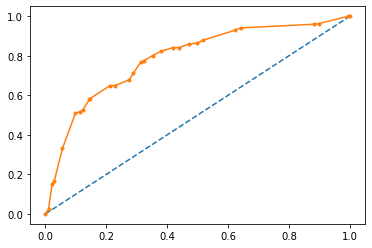

auc_score =  0.7887077340161156


In [326]:
print('Test data:')
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.show()
print('auc_score = ',auc_test1)

The area under the train roc curve is neither too steep not too flat. The area under the test roc curve is a bit flatter compared to the train curve

In [253]:
## For Random Forest:

In [254]:
### Classification Report

In [327]:
print('Train data')
print(classification_report(y_train,y_train_predict1))

Train data
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1359
           1       0.72      0.60      0.65       643

    accuracy                           0.80      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.80      0.79      2002



In [328]:
print('Test data')
print(classification_report(y_test,y_test_predict1))

Test data
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.59      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [257]:
### Confusion_Matrix

In [332]:
print('The Confusion matrix for the Random Forest model for train data set is \n')
confusion_matrix(y_train,y_train_predict1)

The Confusion matrix for the Random Forest model for train data set is 



array([[1206,  153],
       [ 256,  387]], dtype=int64)

In [333]:
print('The Confusion matrix for the Random Forest model for test data set is \n')
confusion_matrix(y_test,y_test_predict1)

The Confusion matrix for the Random Forest model for test data set is 



array([[514,  74],
       [112, 159]], dtype=int64)

In [260]:
### Accuracy

In [334]:
print('The accuracy score for Random Forest model for train data set is =',round(best_grid2.score(x_train,y_train),2))

The accuracy score for Random Forest model for train data set is = 0.8


In [336]:
print('The accuracy score for Random Forest model for test data set is =',round(best_grid2.score(x_test,y_test),2))

The accuracy score for Random Forest model for test data set is = 0.78


In [337]:
### ROC

In [338]:
probs_train2 = best_grid2.predict_proba(x_train)

In [339]:
probs_train2 = probs_train2[:,1]

In [340]:
probs_train2

array([0.22083601, 0.24973459, 0.24072991, ..., 0.04892099, 0.2659716 ,
       0.32292685])

In [341]:
probs_test2 = best_grid2.predict_proba(x_test)

In [342]:
auc_train2 = roc_auc_score(y_train,probs_train2)
auc_train2

0.8507610687118994

In [343]:
auc_test2 = roc_auc_score(y_test,probs_test2[:,1])
auc_test2

0.812335266209805

Train data


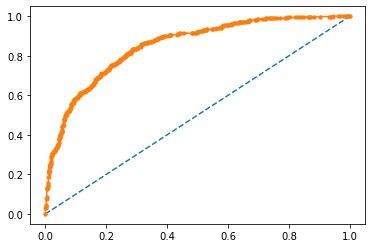

auc_score =  0.8507610687118994


In [344]:
print('Train data')
fpr,tpr,thresholds = roc_curve(y_train,probs_train2)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.show()
print('auc_score = ',auc_train2)

Test data


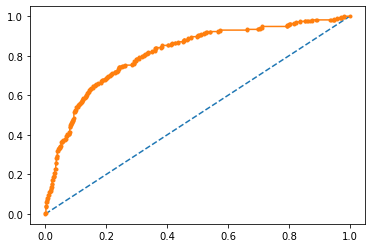

auc_score =  0.812335266209805


In [345]:
print('Test data')
fpr,tpr,thresholds = roc_curve(y_test,probs_test2[:,1])
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.show()
print('auc_score = ',auc_test2)

In [346]:
# For MLP Classifier

In [347]:
### Classification Report

In [352]:
print('Train Data')
print(classification_report(y_train,y_train_predict2))

Train Data
              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1359
           1       0.73      0.31      0.44       643

    accuracy                           0.74      2002
   macro avg       0.74      0.63      0.64      2002
weighted avg       0.74      0.74      0.71      2002



In [353]:
print('Test Data')
print(classification_report(y_test,y_test_predict2))

Test Data
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       588
           1       0.73      0.31      0.43       271

    accuracy                           0.75       859
   macro avg       0.74      0.63      0.63       859
weighted avg       0.74      0.75      0.71       859



In [276]:
### Confusion_Matrix

In [356]:
print('The Confusion matrix for the ANN model for train data set is \n')
confusion_matrix(y_train,y_train_predict2)

The Confusion matrix for the ANN model for train data set is 



array([[1283,   76],
       [ 441,  202]], dtype=int64)

In [357]:
print('The Confusion matrix for the ANN model for test data set is \n')
confusion_matrix(y_test,y_test_predict2)

The Confusion matrix for the ANN model for test data set is 



array([[557,  31],
       [188,  83]], dtype=int64)

In [279]:
### Accuracy

In [354]:
print('The accuracy score for ANN model for train data set is =',round(best_grid3.score(x_train,y_train),2))

The accuracy score for ANN model for train data set is = 0.74


In [355]:
print('The accuracy score for ANN model for test data set is =',round(best_grid3.score(x_test,y_test),2))

The accuracy score for ANN model for test data set is = 0.75


In [358]:
### ROC

In [359]:
probs_test3 = best_grid3.predict_proba(x_test)

In [360]:
probs_train3 = best_grid3.predict_proba(x_train)

Train Data


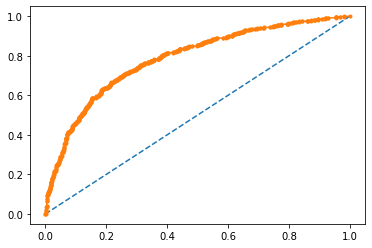

auc_score =  0.7866404146311039


In [361]:
print('Train Data')
fpr,tpr,thresholds = roc_curve(y_train,probs_train3[:,1])
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.show()
print('auc_score = ',roc_auc_score(y_train,probs_train3[:,1]))

Test Data


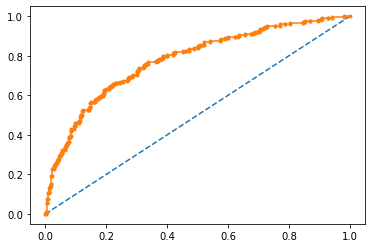

auc_score =  0.7778447172226826


In [362]:
print('Test Data')
fpr,tpr,thresholds = roc_curve(y_test,probs_test3[:,1])
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.show()
print('auc_score = ',roc_auc_score(y_test,probs_test3[:,1]))

2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (2.5 pts). Describe on which model is best/optimized (1.5 pts ). A table containing all the values of accuracies, precision, recall, auc_roc_score, f1 score. Comparison between the different models(final) on the basis of above table values. After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.

In [287]:
#Solution in business report

2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

In [288]:
#Solution in business report